In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def scale_data(data):
    for i in data.columns:
        if i != "Outcome":
          data[i] = (data[i] - data[i].mean()) / (data[i].max() - data[i].min())
          # data[i] = (data[i] - data[i].mean()) / data[i].std()
    return data

In [4]:
def plot_data():
    # y = target values, last column of the data frame
    y = data.iloc[:, -1]
    # filter out the people who has diabetes
    has_diabetes = data.loc[y == 1]

    # filter out the people who doesn't have diabetes
    no_diabetes = data.loc[y == 0]
    # plots
    plt.scatter(has_diabetes.iloc[:, 0], has_diabetes.iloc[:, 1], s=10, label='has_diabetes')
    plt.scatter(no_diabetes.iloc[:, 0], no_diabetes.iloc[:, 1], s=10, label='no_diabetes')
    plt.legend()
    plt.show()

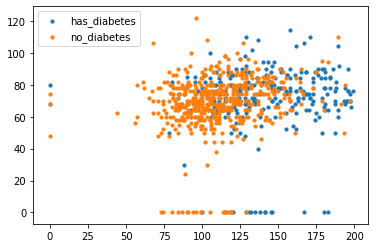

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.136208,0.023726,0.146096,-0.094326,0.023956,0.066236,0.279319,1
1,-0.180375,-0.025455,0.085490,-0.094326,-0.080366,-0.051612,-0.037348,0
2,0.312088,-0.041848,-0.207439,-0.094326,-0.129547,0.085450,-0.020681,1
3,-0.160274,-0.025455,0.024884,0.016785,-0.058012,-0.130178,-0.204015,0
4,0.080932,-0.238569,0.146096,0.104256,0.165535,0.775458,-0.004015,1
...,...,...,...,...,...,...,...,...
763,-0.099973,0.056513,0.277410,0.118440,0.013523,-0.128470,0.495985,0
764,0.005555,0.007332,0.065288,-0.094326,0.071646,-0.056309,-0.104015,0
765,0.000530,0.023726,0.024884,0.038062,-0.086328,-0.096873,-0.054015,0
766,0.025656,-0.074635,-0.207439,-0.094326,-0.028205,-0.052466,0.229319,1


In [17]:
data = pd.read_csv("diabetes_data.csv", index_col = None, header = 0)
# print(data)
plot_data()
data = scale_data(data)
data

In [18]:
# 70% of the data assigned to the train set
train_size = int(0.7*len(data))
train_set = data[:train_size]

# 30% of the data assigned to the test set
test_size = int(0.3*len(data))
test_set = data[train_size:len(data)+1]

In [19]:
X = train_set.iloc[:, :-1].values # Taking out all the features (except for output column) from the data and storing into X
X = np.concatenate((np.ones((X.shape[0], 1), dtype=float), X), axis=1)
Y = train_set.iloc[:, -1].values  # The column that contains the result/output
Y = Y.reshape((-1, 1)) # making the array n*1 shape

In [20]:
def sigmoid(z):
    g = 1.0 / (1 + np.exp(-z))
    return g

def cost(x, y, theta):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

def gradient_Descent(theta, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, theta))
    grad = np.matmul(X.T, (h - y)) / m;
    theta = theta - alpha * grad
    return theta


def predict(test_data, Theta, Y_test):
    h = sigmoid(np.matmul(test_data, Theta))
    predicted_classes = (h > .5).astype(int)
    accuracy = np.mean(predicted_classes == Y_test)
    return accuracy * 100, (h > .5).astype(int)

In [21]:
# Initialization part
np.random.seed(0) # prevents from having different random nums each time code runs
Theta = np.random.uniform(0, 1, size = (X.shape[1], 1)) #this is our weight vectors

In [22]:

iterations = 100000
learning_rate = 0.05
costs = np.zeros(iterations)
for i in range(iterations):
    Theta = gradient_Descent(Theta, learning_rate, X, Y)
    costs[i] = (cost(X, Y, Theta))
    if i % 50 == 0:
        print(cost(X, Y, Theta))

[[0.75337489]]
[[0.64109674]]
[[0.60605157]]
[[0.5939165]]
[[0.58864272]]
[[0.58552859]]
[[0.5831465]]
[[0.58104765]]
[[0.57908643]]
[[0.57721358]]
[[0.57541104]]
[[0.57367103]]
[[0.57198921]]
[[0.57036251]]
[[0.56878832]]
[[0.56726431]]
[[0.56578829]]
[[0.56435819]]
[[0.56297207]]
[[0.56162808]]
[[0.56032446]]
[[0.55905955]]
[[0.55783178]]
[[0.55663964]]
[[0.55548171]]
[[0.55435665]]
[[0.55326315]]
[[0.55220001]]
[[0.55116605]]
[[0.55016017]]
[[0.54918132]]
[[0.54822848]]
[[0.54730071]]
[[0.54639708]]
[[0.54551673]]
[[0.54465883]]
[[0.54382258]]
[[0.54300722]]
[[0.54221204]]
[[0.54143634]]
[[0.54067946]]
[[0.53994077]]
[[0.53921966]]
[[0.53851555]]
[[0.53782789]]
[[0.53715614]]
[[0.5364998]]
[[0.53585838]]
[[0.53523141]]
[[0.53461844]]
[[0.53401904]]
[[0.53343279]]
[[0.5328593]]
[[0.53229819]]
[[0.53174908]]
[[0.53121162]]
[[0.53068548]]
[[0.53017033]]
[[0.52966585]]
[[0.52917174]]
[[0.5286877]]
[[0.52821346]]
[[0.52774875]]
[[0.52729329]]
[[0.52684686]]
[[0.52640918]]
[[0.52598005]]


[[0.49632056]]
[[0.49631833]]
[[0.49631611]]
[[0.49631391]]
[[0.49631173]]
[[0.49630956]]
[[0.49630741]]
[[0.49630528]]
[[0.49630316]]
[[0.49630106]]
[[0.49629898]]
[[0.49629691]]
[[0.49629486]]
[[0.49629283]]
[[0.49629081]]
[[0.49628881]]
[[0.49628682]]
[[0.49628485]]
[[0.49628289]]
[[0.49628095]]
[[0.49627902]]
[[0.49627711]]
[[0.49627521]]
[[0.49627333]]
[[0.49627147]]
[[0.49626961]]
[[0.49626778]]
[[0.49626595]]
[[0.49626414]]
[[0.49626235]]
[[0.49626057]]
[[0.4962588]]
[[0.49625705]]
[[0.49625531]]
[[0.49625358]]
[[0.49625187]]
[[0.49625017]]
[[0.49624848]]
[[0.4962468]]
[[0.49624514]]
[[0.4962435]]
[[0.49624186]]
[[0.49624024]]
[[0.49623863]]
[[0.49623703]]
[[0.49623545]]
[[0.49623387]]
[[0.49623231]]
[[0.49623076]]
[[0.49622923]]
[[0.4962277]]
[[0.49622619]]
[[0.49622469]]
[[0.4962232]]
[[0.49622172]]
[[0.49622025]]
[[0.4962188]]
[[0.49621735]]
[[0.49621592]]
[[0.4962145]]
[[0.49621309]]
[[0.49621169]]
[[0.4962103]]
[[0.49620892]]
[[0.49620755]]
[[0.49620619]]
[[0.49620485]]
[[0

[[0.49603205]]
[[0.49603201]]
[[0.49603198]]
[[0.49603194]]
[[0.49603191]]
[[0.49603187]]
[[0.49603184]]
[[0.4960318]]
[[0.49603177]]
[[0.49603174]]
[[0.4960317]]
[[0.49603167]]
[[0.49603164]]
[[0.4960316]]
[[0.49603157]]
[[0.49603154]]
[[0.49603151]]
[[0.49603147]]
[[0.49603144]]
[[0.49603141]]
[[0.49603138]]
[[0.49603135]]
[[0.49603132]]
[[0.49603129]]
[[0.49603126]]
[[0.49603123]]
[[0.4960312]]
[[0.49603117]]
[[0.49603114]]
[[0.49603111]]
[[0.49603108]]
[[0.49603105]]
[[0.49603102]]
[[0.49603099]]
[[0.49603097]]
[[0.49603094]]
[[0.49603091]]
[[0.49603088]]
[[0.49603085]]
[[0.49603083]]
[[0.4960308]]
[[0.49603077]]
[[0.49603075]]
[[0.49603072]]
[[0.49603069]]
[[0.49603067]]
[[0.49603064]]
[[0.49603062]]
[[0.49603059]]
[[0.49603057]]
[[0.49603054]]
[[0.49603052]]
[[0.49603049]]
[[0.49603047]]
[[0.49603044]]
[[0.49603042]]
[[0.49603039]]
[[0.49603037]]
[[0.49603035]]
[[0.49603032]]
[[0.4960303]]
[[0.49603028]]
[[0.49603025]]
[[0.49603023]]
[[0.49603021]]
[[0.49603018]]
[[0.49603016]]
[

[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602708]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602707]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602706]]
[[0.49602705]]
[[0.49602705]]
[[0.49602705]]
[[0.49602705]]
[[0.49602705]]
[[0.496027

In [23]:
X_test = test_set.iloc[:, :-1].values
X_test = np.hstack((np.ones([X_test.shape[0],1]), X_test))
Y_test = test_set.iloc[:, -1].values  # The column that contains the result/output
Y_test = Y_test.reshape((-1, 1)) # making the array n*1 shape
accuracy, predicted_classes = predict(X_test, Theta, Y_test)
print("Accuracy:", "{:.2f}%".format(accuracy))

Accuracy: 77.92%


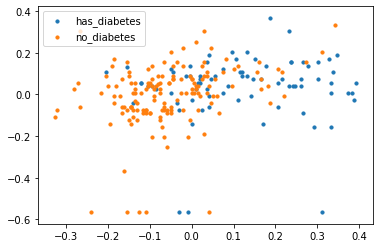

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

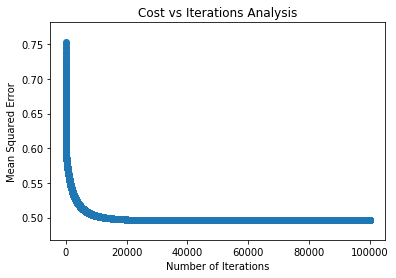

In [24]:

# y = target values, last column of the data frame
y = test_set.iloc[:, -1]
# filter out the people who has diabetes
has_diabetes = test_set.loc[y == 1]
# filter out the people who doesn't have diabetes
no_diabetes = test_set.loc[y == 0]
# plots
plt.scatter(has_diabetes.iloc[:, 0], has_diabetes.iloc[:, 1], s=10, label='has_diabetes')
plt.scatter(no_diabetes.iloc[:, 0], no_diabetes.iloc[:, 1], s=10, label='no_diabetes')
plt.legend()
plt.show()

# Plotting Line Plot for Number of Iterations vs MSE
plt.scatter(range(iterations),costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')